# Report image produced by executing following lines of code.

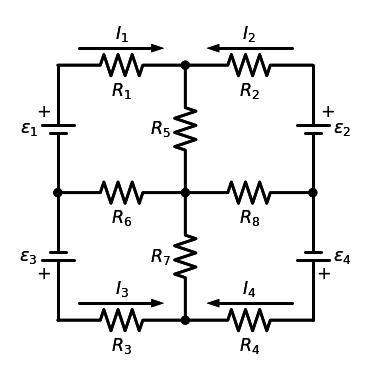

In [1]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
    d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
    d += elm.Resistor().left().label('$R_8$', loc='bottom')
    d += elm.Resistor().up().label('$R_5$')
    d += elm.Dot()
    d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
    d += elm.Dot()
    d.push()
    d += elm.Resistor().right().label('$R_6$', loc='bottom')
    d.pop()
    d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
    d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
    d += elm.Dot()
    d.push()
    d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
    d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().up().label('$R_7$', loc='top')
    d += elm.Dot().color('black')
    d += elm.CurrentLabel().at(R1).label('$I_1$')
    d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
    d += elm.CurrentLabel().at(R3).label('$I_3$')
    d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')


# Write linear equations for I1, I2, I3, and I4 from produced figure.

$ \epsilon_1 = I_1(R_1 + R_5 + R_6) + I_2.R_5 - I_3.R_6 $

$ \epsilon_2 = I_2(R_2 + R_5 + R_8) + I_1.R_5 - I_4.R_8 $

$ \epsilon_3 = I_3(R_3 + R_6 + R_7) - I_1.R_6 + I_4.R_7 $

$ \epsilon_4 = I_4(R_4 + R_7 + R_8) - I_2.R_8 + I_3.R_7 $

# Write matrix form of previous linear equations.
\begin{bmatrix}
R_1 + R_5 + R_6 & R_5 & -R_6 & 0 \\
R_5 & R_2 + R_5 + R_8 & 0 & -R_8 \\
-R_6 & 0 & R_3 + R_6 + R_7 & R_7 \\
0 & -R_8 & R_7 & R_4 + R_7 + R_8
\end{bmatrix}\begin{bmatrix}
I_1 \\
I_2 \\
I_3 \\
I_4
\end{bmatrix}
=\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\epsilon_4
\end{bmatrix}

# Write augmented matrix for previous matrix and code representing the augmented matrix.
\begin{equation}
\left[\begin{array}{cccc|c}
R_1+R_5+R_6 & R_5 & -R_6 & 0 & \epsilon_1 \\
R_5 & R_2+R_5+R_8 & 0 & -R_8 & \epsilon_2 \\
-R_6 & 0 & R_3+R_6+R_7 & R_7 & \epsilon_3 \\
0 & -R_8 & R_7 & R_4+R_7+R_8 & \epsilon_4 \
\end{array}\right]
\end{equation}

# Find solutions for I1, I2, I3, and I4 using numpy.linalg.solve for following values, where Ri is in $\Omega$ and $\epsilon_i$ is in V.

In [7]:
import numpy as np
#definisikan kondisi awal
R1 = 1
R2 = 2
R3 = 3
R4 = 4
R5 = 5
R6 = 6
R7 = 7
R8 = 8
E1 = 12
E2 = 15
E3 = 16
E4 = 19

#buat matrix koefisiennya
A = np.array([[R1+R5+R6, R5, -R6, 0],
              [R5, R2+R5+R8, 0, -R8],
              [-R6, 0, R3+R6+R7, R7],
              [0, -R8, R7, R4+R7+R8]])
#buat matrix b
b = np.array([E1, E2, E3, E4])

#menyelesaikan persamaan linear dari matrix Ax = b dimana x adalah solusinya
solution = np.linalg.solve(A, b)
I1, I2, I3, I4 = solution

#tampilkan nilai I1,I2,I3,I4
print("Nilai arus:")
print("I1 =", I1)
print("I2 =", I2)
print("I3 =", I3)
print("I4 =", I4)

Nilai arus:
I1 = 0.6917279065385346
I2 = 1.5161107970604855
I3 = 0.6468814772941404
I4 = 1.4000376860749946
